# Advertisement Project (Predict Ad click)

## Name : Naseem mohammed

## ID       : 455816136


## github link:

https://github.com/NaseemAlqahtani/Advertisement-Project


Linear model Regression is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability that an instance is greater than 50%, then the model predicts that the instance belongs to that class 1, or else it predicts that it does not. This makes it a binary classifier. In this notebook we will look at the theory behind `Linear Regression`  and use it to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': cutomer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

# Problem Statement: Predicting Ad Clicks
In the digital advertising landscape, understanding user behavior and predicting ad clicks is crucial for optimizing marketing campaigns and maximizing ROI. Currently, predicting ad clicks relies heavily on historical data analysis and statistical models, which may not capture the complex and dynamic nature of user behavior.

Developing a reliable model for predicting ad clicks would enable advertisers to:

- Target the right audience: Improve ad targeting by identifying users with a high propensity to click, ensuring ads reach more receptive individuals.
- Optimize ad campaigns: Effectively allocate resources by focusing on campaigns with the highest potential for successful engagement.
- Personalize ad content: Tailor ads to individual users based on their predicted click likelihood, increasing the relevance and effectiveness of each ad.
- Measure campaign performance: Accurately evaluate the effectiveness of ad campaigns by tracking click-through rates and other metrics.

# Objective:
This research aims to develop a robust and accurate machine learning model for predicting whether an internet user will click on a specific advertisement. The model will be trained on historical ad click data, incorporating user features like demographics, browsing behavior, and past interactions with similar ads. By analyzing these data points, the model will learn to identify patterns and relationships that can predict the probability of ad click for any given user and advertisement pair.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")


data = pd.read_csv("advertising.csv")
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [3]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Data Cleaning

In [4]:
data=data.drop_duplicates()

In [5]:
#check for missing values, count them and print the sum for every column
data.isnull().sum() 

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
print(data[data['Daily Time Spent on Site']==0].shape[0])
print(data[data['Age']==0].shape[0])
print(data[data['Area Income']==0].shape[0])
print(data[data['Daily Internet Usage']==0].shape[0])
print(data[data['Ad Topic Line']==0].shape[0])
print(data[data['City']==0].shape[0])
print(data[data['Male']==0].shape[0])
print(data[data['Country']==0].shape[0])
print(data[data['Timestamp']==0].shape[0])
print(data[data['Clicked on Ad']==0].shape[0])

0
0
0
0
0
0
519
0
0
500


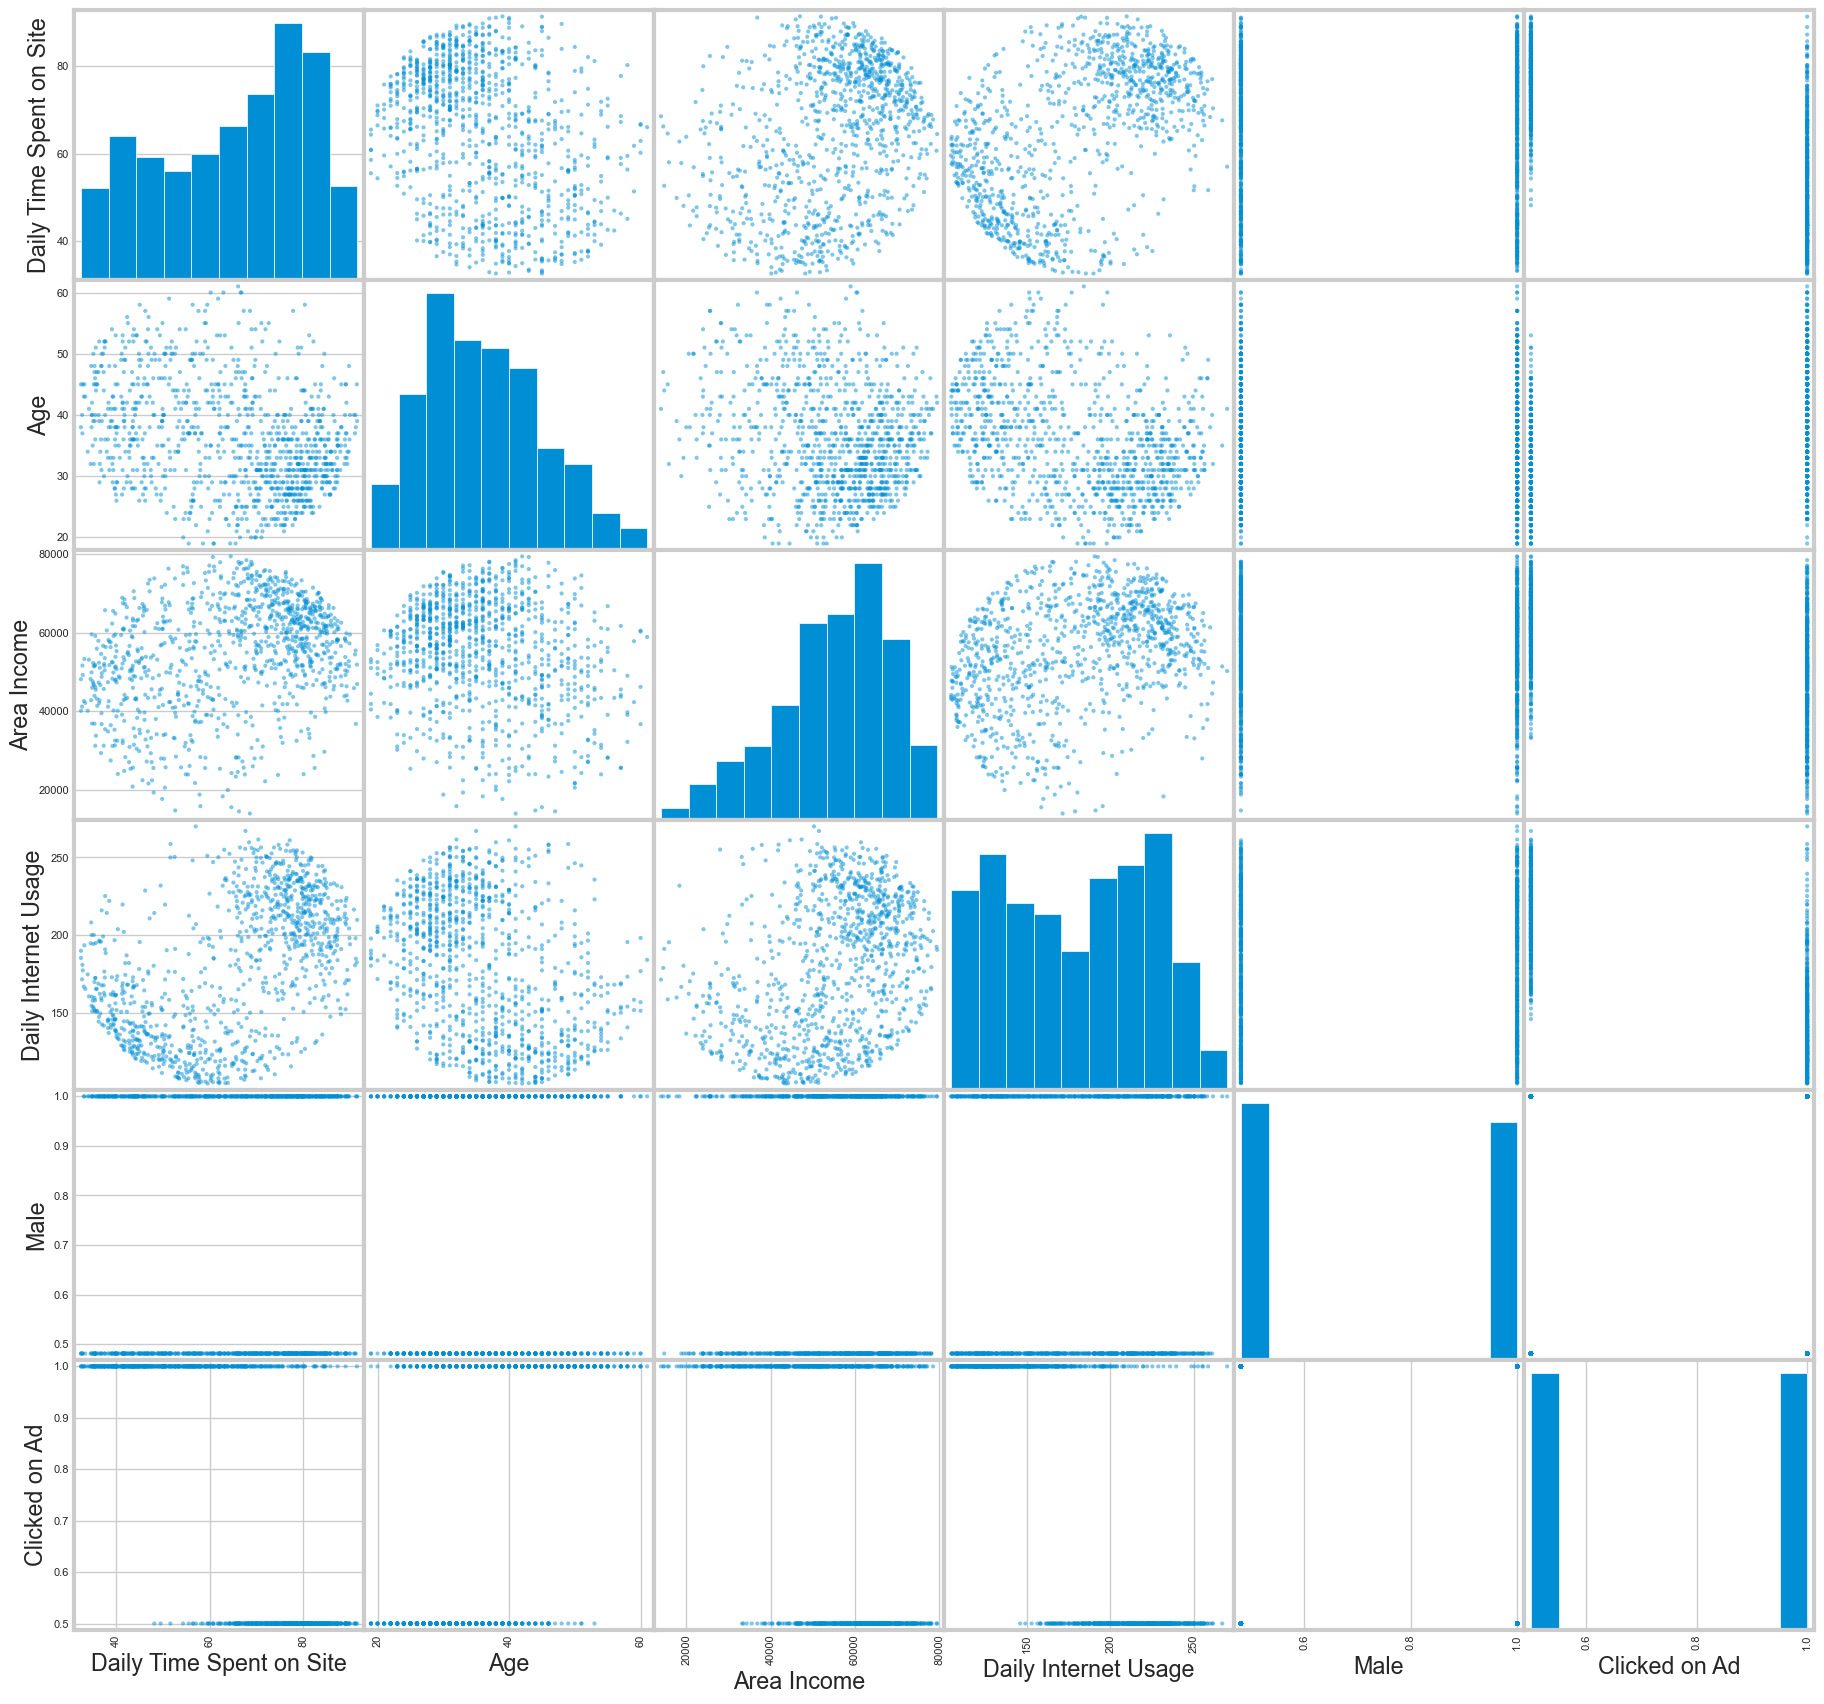

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(20,20));

### outliers :-

In [8]:
data['Male']=data['Male'].replace(0,data['Male'].mean())#normal distribution
data['Clicked on Ad']=data['Clicked on Ad'].replace(0,data['Clicked on Ad'].mean())#normal distribution

In [9]:
print(data[data['Male']==0].shape[0])

print(data[data['Clicked on Ad']==0].shape[0])

0
0


# 1. Exploratory Data Analysis

<AxesSubplot:xlabel='Clicked on Ad'>

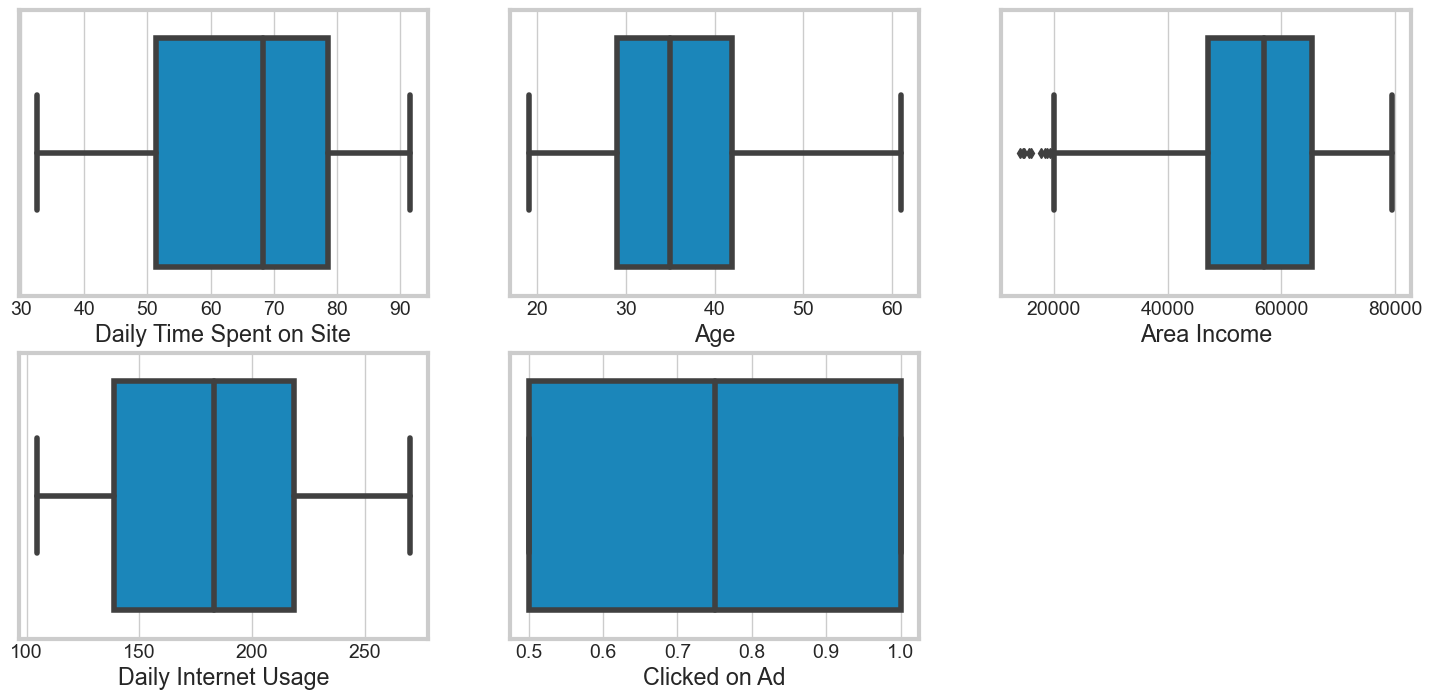

In [22]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Daily Time Spent on Site',data=data)
plt.subplot(3,3,2)
sns.boxplot(x='Age',data=data)
plt.subplot(3,3,3)
sns.boxplot(x='Area Income',data=data)
plt.subplot(3,3,4)
sns.boxplot(x='Daily Internet Usage',data=data)
plt.subplot(3,3,5)
sns.boxplot(x='Clicked on Ad',data=data)



Text(0.5, 0, 'Age')

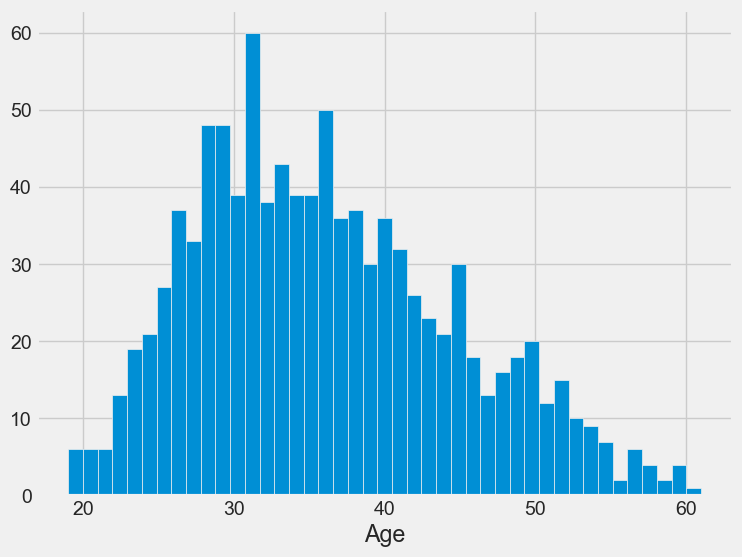

In [10]:
plt.figure(figsize=(8, 6))
data.Age.hist(bins=data.Age.nunique())
plt.xlabel('Age')

<Figure size 800x600 with 0 Axes>

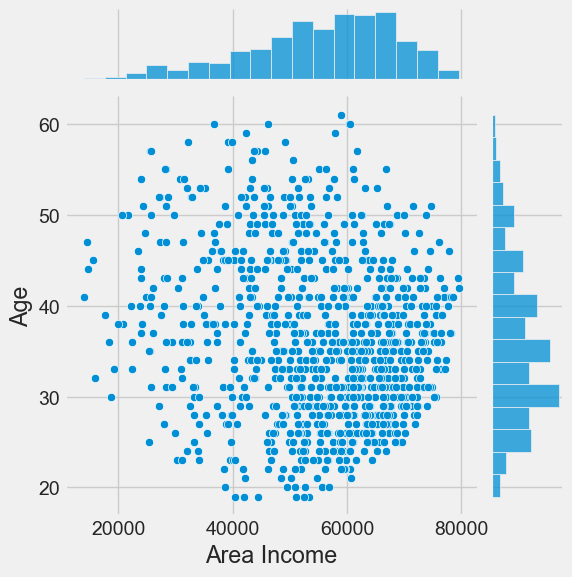

In [11]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=data["Area Income"], y=data.Age)

<Figure size 800x600 with 0 Axes>

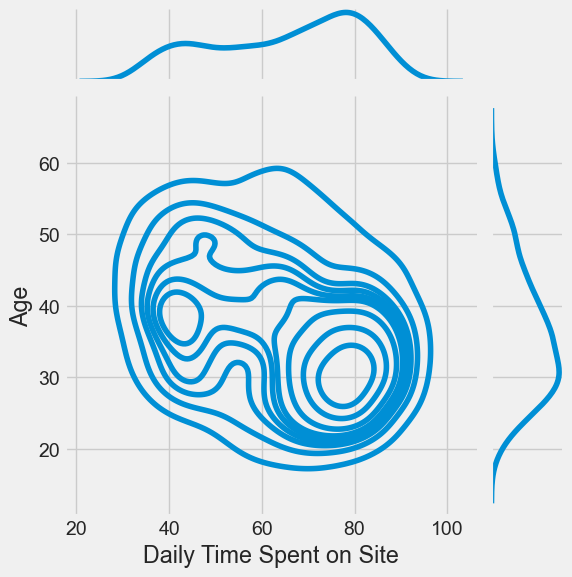

In [12]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=data["Daily Time Spent on Site"], y=data.Age, kind='kde')

<Figure size 800x600 with 0 Axes>

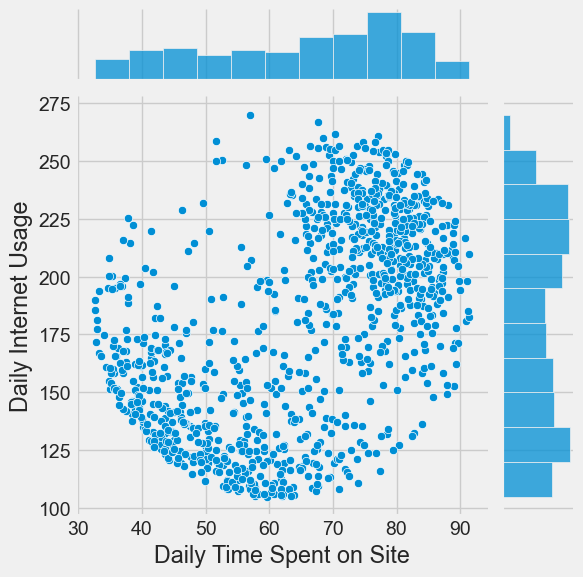

In [13]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=data["Daily Time Spent on Site"], y=data["Daily Internet Usage"])

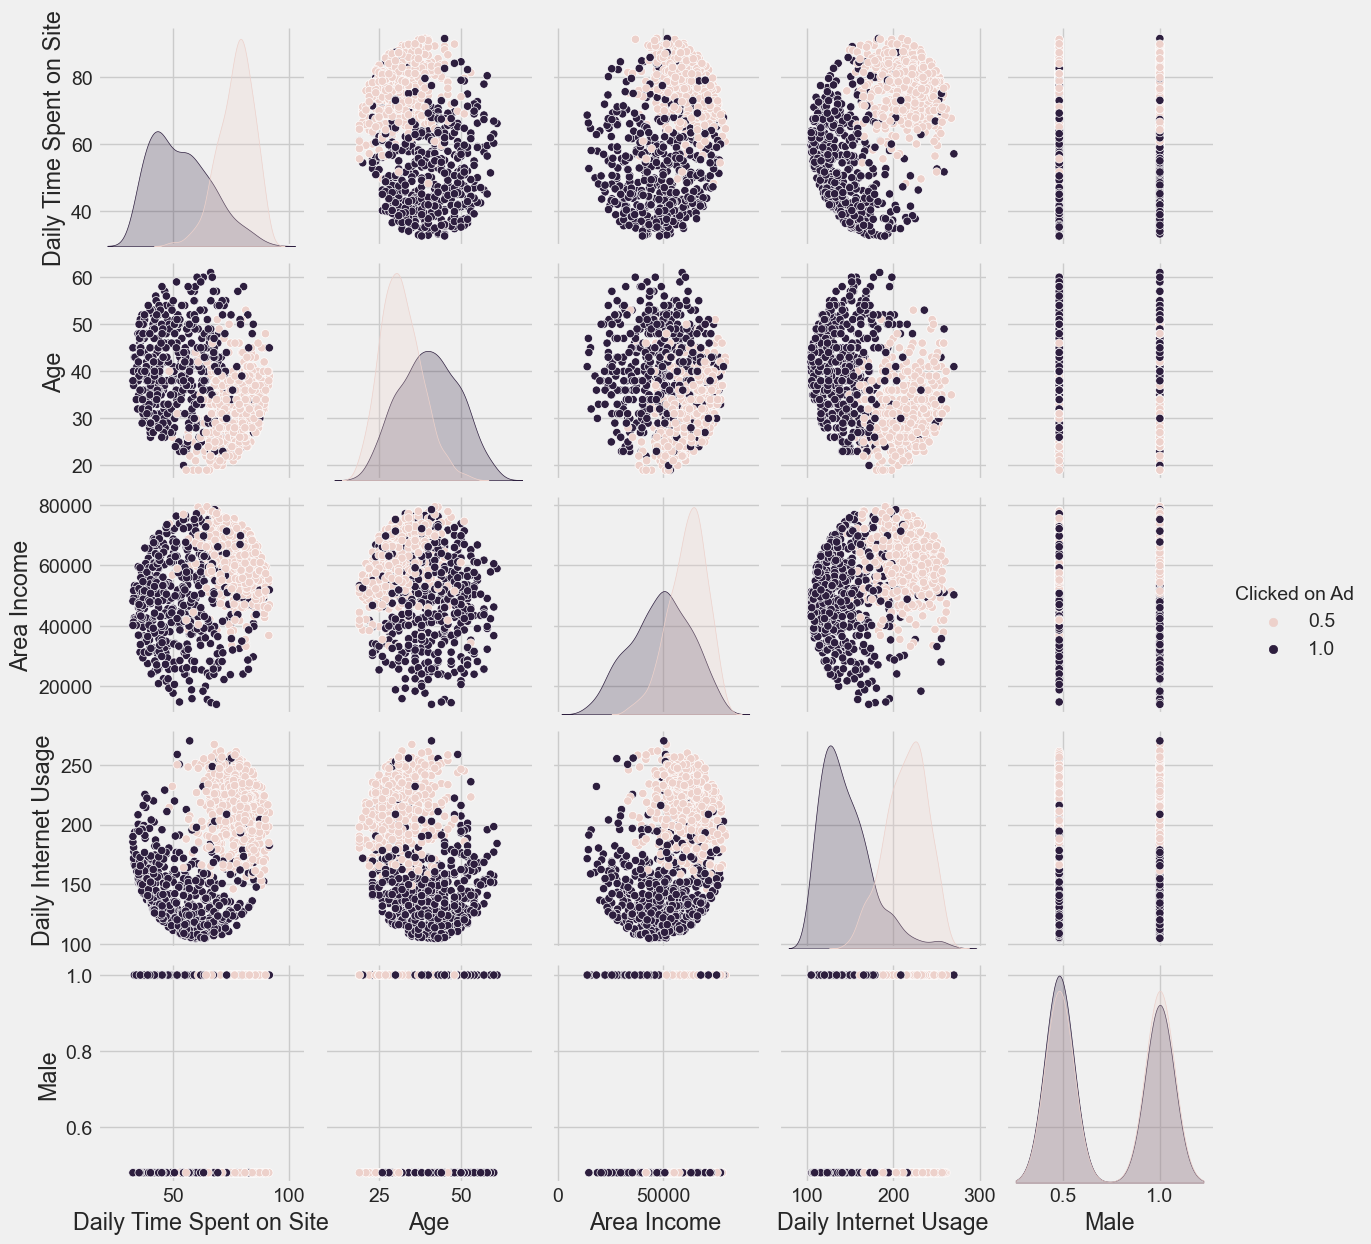

In [14]:
sns.pairplot(data, hue='Clicked on Ad')

In [15]:
data['Clicked on Ad'].value_counts()

0.5    500
1.0    500
Name: Clicked on Ad, dtype: int64

<AxesSubplot:>

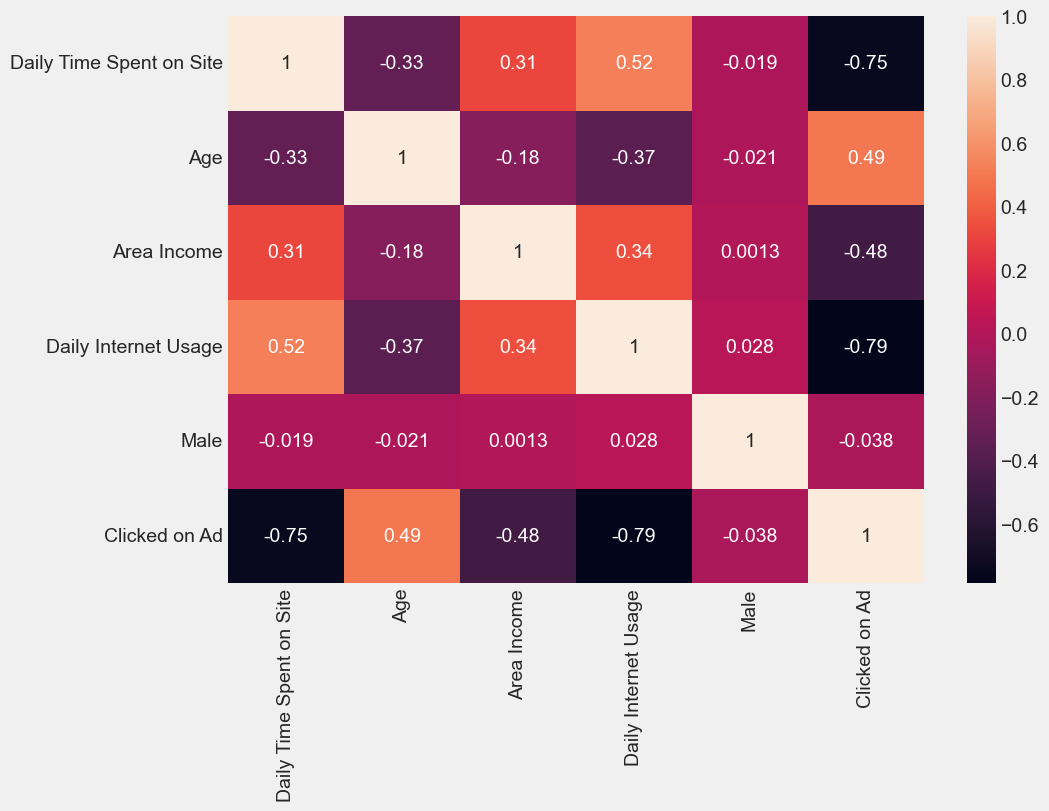

In [16]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True)

# Logistic Regression

Logistic regression is the go-to linear classification algorithm for two-class problems. It is easy to implement, easy to understand and gets great results on a wide variety of problems, even when the expectations the method has for your data are violated.


Text(0.5, 1.0, 'Sigmoid Function')

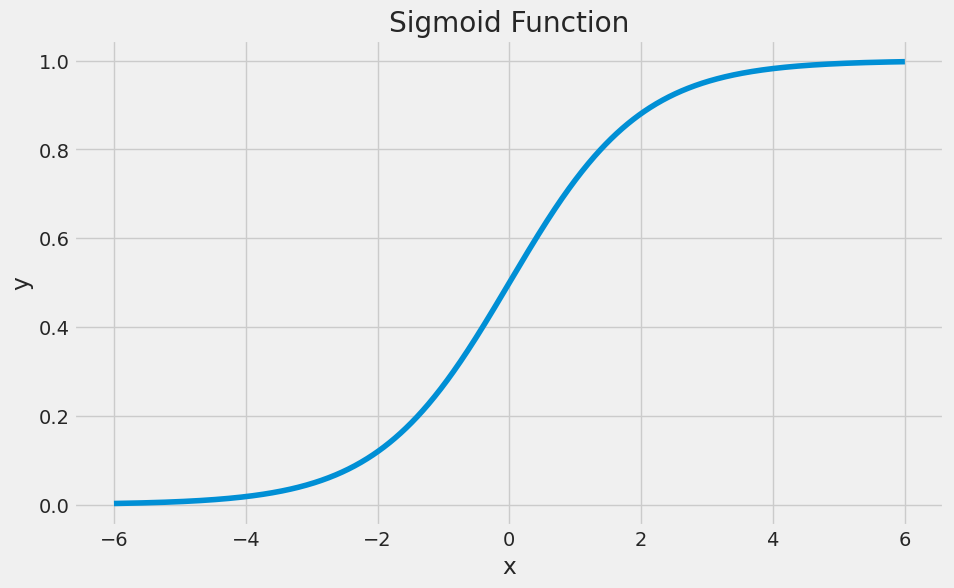

In [11]:
x = np.linspace(-6, 6, num=1000)
plt.figure(figsize=(10, 6))
plt.plot(x, (1 / (1 + np.exp(-x))))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sigmoid Function")

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Reasons of using scikit-learn (not pandas) for ML preprocessing:
1. You can cross-validate the entire workflow.
2. You can grid search model & preprocessing hyperparameters.
3. Avoids adding new columns to the source DataFrame.
4. Pandas lacks separate fit/transform steps to prevent data leakage.

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split


X = data.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'], axis=1)
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# cat_columns = []
num_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']


ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression


lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.43%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.964088    0.985207  0.974286    0.974648      0.974527
recall       0.985876    0.962428  0.974286    0.974152      0.974286
f1-score     0.974860    0.973684  0.974286    0.974272      0.974279
support    354.000000  346.000000  0.974286  700.000000    700.000000
_______________________________________________
Confusion Matrix: 
 [[349   5]
 [ 13 333]]

Test Result:
Accuracy Score: 97.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.959732    0.980132      0.97    0.969932      0.970204
recall       0.979452    0.961039      0.97    0.970246      0.970000
f1-score     0.969492    0.970492      0.97    0.969992      0.970005
support    146.000000  154.000000      0.97  300.000000    300.

# 5. Performance Measurement

#### 1. Confusion Matrix
- Each row: actual class
- Each column: predicted class

First row: Non-clicked Ads, the negative class:
* 143 were correctly classified as Non-clicked Ads. **True negatives**. 
* Remaining 6 were wrongly classified as clicked Ads. **False positive**


Second row: The clicked Ads, the positive class:
* 3 were incorrectly classified as Non-clicked Ads. **False negatives**
* 146 were correctly classified clicked Ads. **True positives**

#### 2. Precision

**Precision** measures the accuracy of positive predictions. Also called the `precision` of the classifier ==> `98.01%`

$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$

#### 3. Recall

`Precision` is typically used with `recall` (`Sensitivity` or `True Positive Rate`). The ratio of positive instances that are correctly detected by the classifier.

$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$ ==> `96.10%`

#### 4. F1 Score

$F_1$ score is the harmonic mean of precision and recall. Regular mean gives equal weight to all values. Harmonic mean gives more weight to low values.


$$F_1=\frac{2}{\frac{1}{\textrm{precision}}+\frac{1}{\textrm{recall}}}=2\times \frac{\textrm{precision}\times \textrm{recall}}{\textrm{precision}+ \textrm{recall}}=\frac{TP}{TP+\frac{FN+FP}{2}}$$ ==> `97.05%`

The $F_1$ score favours classifiers that have similar precision and recall.

#### 5. Precision / Recall Tradeoff

Increasing precision reduced recall and vice versa

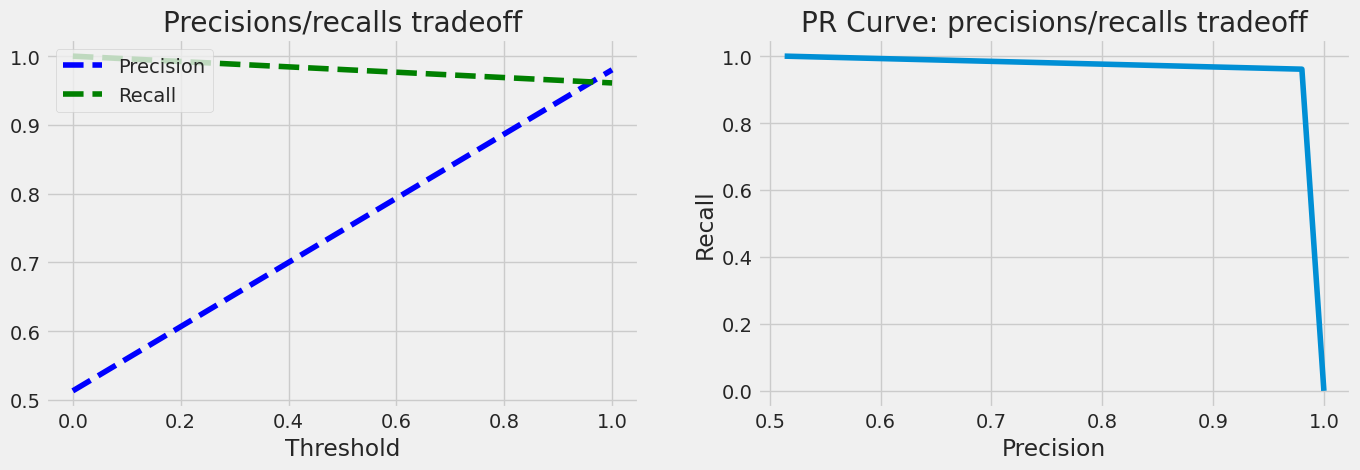

In [16]:
from sklearn.metrics import precision_recall_curve


def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precisions/recalls tradeoff")

    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test))


plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(2, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

## The Receiver Operating Characteristics (ROC) Curve

Instead of plotting precision versus recall, the ROC curve plots the `true positive rate` (another name for recall) against the `false positive rate`. The `false positive rate` (FPR) is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the `true negative rate`, which is the ratio of negative instances that are correctly classified as negative.

The TNR is also called `specificity`. Hence the ROC curve plots `sensitivity` (recall) versus `1 - specificity`.

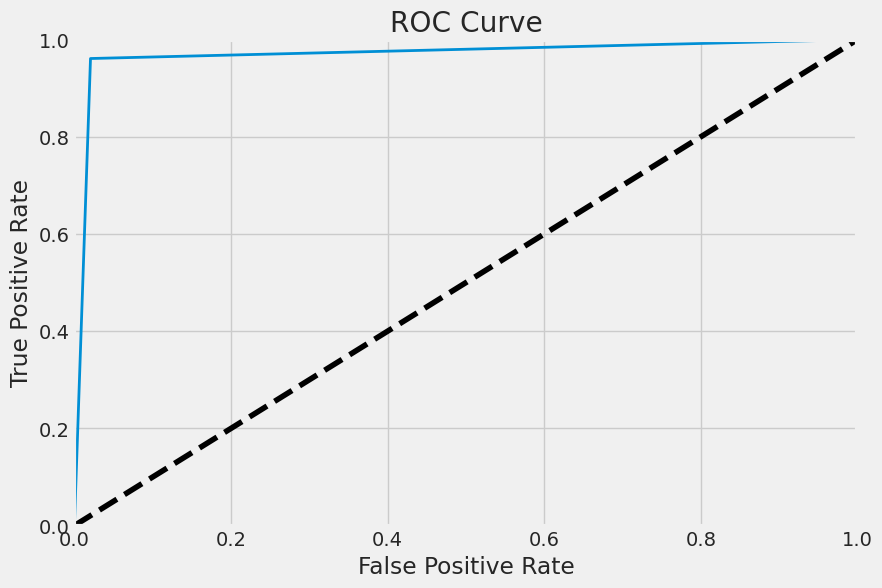

In [17]:
from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(9,6)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [18]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, lr_clf.predict(X_test))

0.9702455079167409

Use PR curve whenever the **positive class is rare** or when you care more about the false positives than the false negatives

Use ROC curve whenever the **negative class is rare** or when you care more about the false negatives than the false positives


In the example above, the ROC curve seemed to suggest that the classifier is good. However, when you look at the PR curve, you can see that there are room for improvement.

# 6. Logistic Regression Hyperparameter tuning

In [19]:
from sklearn.model_selection import GridSearchCV


lr_clf = LogisticRegression()

penalty = ['l1', 'l2']
C = [0.5, 0.6, 0.7, 0.8]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(
    penalty=penalty, 
    C=C, 
    class_weight=class_weight, 
    solver=solver
)

lr_cv = GridSearchCV(
    estimator=lr_clf, 
    param_grid=param_grid, 
    scoring='f1',
    verbose=1, 
    n_jobs=-1, 
    cv=10
)

lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")

lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best parameters: {'C': 0.6, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'saga'}
Train Result:
Accuracy Score: 97.29%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.961433    0.985163  0.972857    0.973298      0.973162
recall       0.985876    0.959538  0.972857    0.972707      0.972857
f1-score     0.973501    0.972182  0.972857    0.972841      0.972849
support    354.000000  346.000000  0.972857  700.000000    700.000000
_______________________________________________
Confusion Matrix: 
 [[349   5]
 [ 14 332]]

Test Result:
Accuracy Score: 97.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.953642    0.986577      0.97    0.970110      0.970549
recall       0.986301    0.954545      0.97

# Summary

logistic regression was successfully applied to build a classification model for predicting whether users will click on an advertisement based on their profile attributes.

The model achieved excellent performance on both training and test sets, with an accuracy of over 97% demonstrating its ability to accurately classify ad clicks. The high precision, recall and F1 scores also indicate the predictions are reliable.

Tuning of hyperparameters like penalty, solver and class weights helped optimize the model. The confusion matrices show very few misclassifications, with most clicks and non-clicks correctly identified.

This model can be a valuable tool for digital marketers to target ads at users most likely to engage. Feature analysis revealed important user behaviors influencing click propensity.

While limited by the dataset used, this case study establishes the viability of machine learning for predictive analytics in digital advertising. With more data, performance could be further improved to support strategic decision making.

logistic regression proved effective for this classification problem. The approach shows promise to enhance ad targeting, campaign optimization and ROI for online businesses.